# Prognozowanie liczby sprzedanych produktów


In [ ]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn import metrics
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LogisticRegression

sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style('ticks')
sns.set_palette("deep")

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/archive/sales_concat.csv', index_col=0)

### Połączenie zbiorów w jeden, dodanie kolumny `week_date` oznaczającej początek tygodnia, zapisanie `df` jako zbiór `sales_concat`

In [ ]:
df_oct = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2019-Oct_weeklysales.csv", index_col=0)

df_nov = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2019-Nov_weeklysales.csv", index_col=0)

df_dec = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2019-Dec_weeklysales.csv", index_col=0)

df_jan = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2020-Jan_weeklysales.csv", index_col=0)

df_feb = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2020-Feb_weeklysales.csv", index_col=0)

df_mar = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2020-Mar_weeklysales.csv", index_col=0)

df_apr = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/archive/2020-Apr_weeklysales.csv", index_col=0)

In [ ]:
# połączenie dataframeów
frames = [df_oct, df_nov, df_dec, df_jan, df_feb, df_mar, df_apr]
df = pd.concat(frames).reset_index(drop=True)

# dodanie kolumny week_date, oznaczającej początek tygodnia (dla wizualizacji)
s_date = "20191001"
start_date = pd.to_datetime(s_date, yearfirst=True)
df["week_date"] = start_date
df["week_date"] = df["week_date"] + df["week_no"].astype("timedelta64[W]")

# zmiana kolejności kolumn
df = df[["week_date", "week_no", "product_id", "brand", "category_code_level1", "category_code_level2", "avg_price", "count"]]
df.to_csv('/content/drive/MyDrive/Colab Notebooks/archive/sales_concat.csv')
df

,week_date,week_no,product_id,brand,category_code_level1,category_code_level2,avg_price,count
0,2019-10-01,0,3800877,polaris,appliances,iron,25.7100,5
1,2019-10-01,0,3701219,tefal,appliances,environment,73.2800,4
2,2019-10-01,0,11200277,saturn,appliances,personal,10.5400,1
3,2019-10-01,0,11200249,polaris,appliances,personal,23.1700,1
4,2019-10-01,0,11200234,bene,appliances,personal,11.2575,4
...,...,...,...,...,...,...,...,...
449902,2020-04-28,30,4600657,dauscher,appliances,kitchen,308.8600,1
449903,2020-04-28,30,4600655,hansa,appliances,kitchen,432.4200,1
449904,2020-04-28,30,4600643,bosch,appliances,kitchen,518.0100,1
449905,2020-04-28,30,4501993,gorenje,appliances,kitchen,317.8500,1


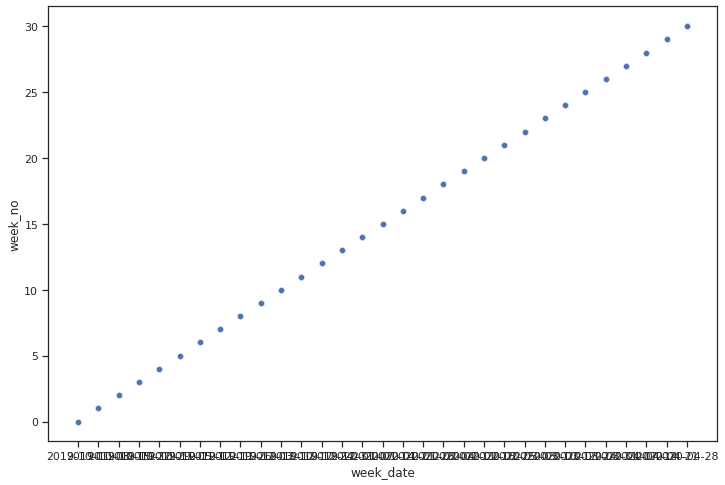

In [ ]:
# sprawdzenie ciągłości dataframeu
sns.scatterplot(y="week_no", x="week_date", data=df)
plt.show()

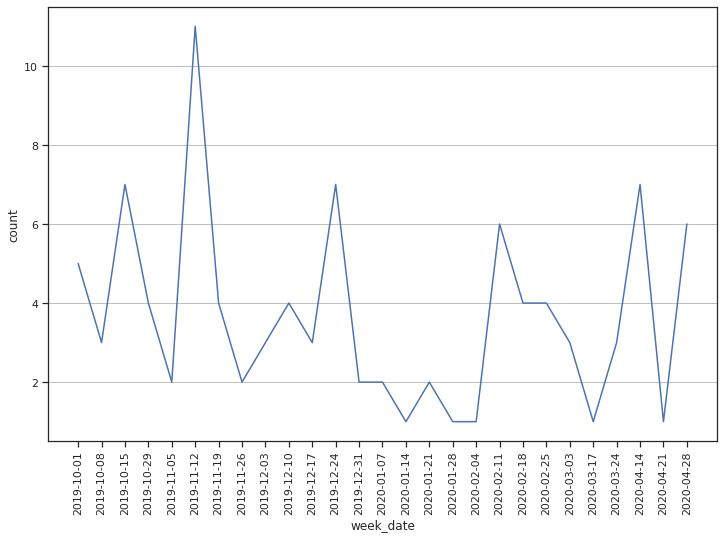

In [ ]:
product_sale = df.loc[df["product_id"] == 3800877].copy()

lp = sns.lineplot(y="count", x="week_date", data=product_sale)
for item in lp.get_xticklabels():
    item.set_rotation(90)

plt.grid(axis='y', color="grey", linewidth=0.5)
plt.show()